### 기본 라이브러리 import 및 폰트 설정

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [3]:
member = pd.read_csv('data/master_member.csv')

### 데이터 시각화

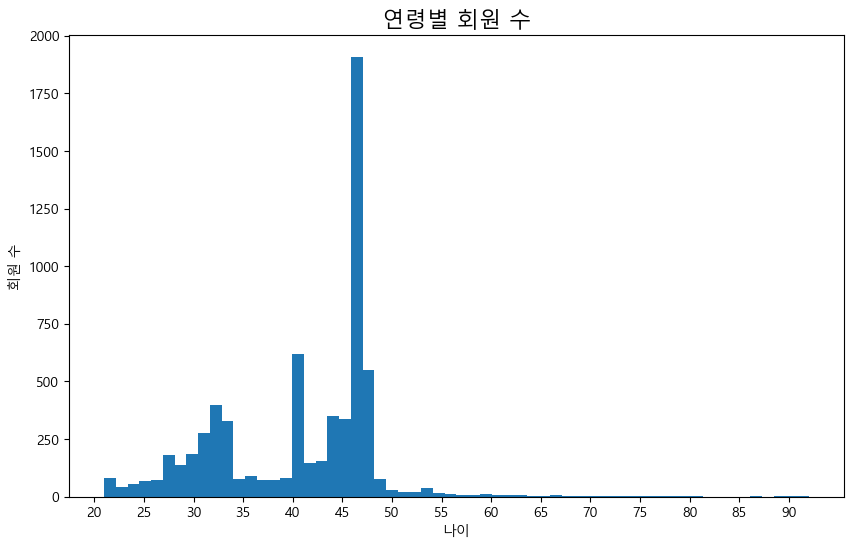

In [4]:
# 연렬별 회원 수 히스토그램
plt.figure(figsize=(10,6))
plt.title('연령별 회원 수', size = 16)
plt.hist(member['나이'], bins=60)
plt.xticks(range(20, 91, 5))
plt.xlabel('나이')
plt.ylabel('회원 수')
plt.show()

In [5]:
# 성별 회원 수 확인
member['성별'].value_counts()

남자    6053
여자     522
Name: 성별, dtype: int64

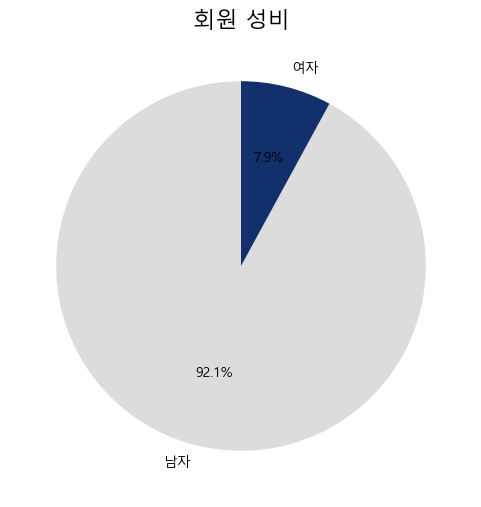

In [6]:
# 회원 성비 파이차트
colors = ['#DCDCDC', '#12306b']
plt.figure(figsize=(20,6))

plt.title('회원 성비', size = 16)
plt.pie(member['성별'].value_counts(), labels=['남자', '여자'], autopct='%.1f%%', startangle=90, colors=colors)

plt.show()

### 데이터 확인 (유입 구분)

In [7]:
member['사업자구분'].value_counts()

개인     4039
사업자    2534
외국인       2
Name: 사업자구분, dtype: int64

In [8]:
member['유입경로'].value_counts()

SNS광고      1098
블로그광고      1087
유튜브광고       944
전단지광고       861
이메일광고       611
잡지광고        505
인터넷검색       423
지인추천        390
기타          269
카카오톡광고      182
인터넷기사광고     161
신문광고         44
Name: 유입경로, dtype: int64

In [9]:
member['유입기기'].value_counts()

PC     3696
모바일    2879
Name: 유입기기, dtype: int64

In [10]:
# 연령대 열 생성
member['나이묶음'] = member['나이'].apply(lambda x : '20_25' if x < 25 else ('25_30' if x < 30 else ('30_35' if x < 35 else ('35_40' if x < 40 else ('40_45' if x < 45 else ('45_50' if x < 50 else '50_'))))))
member['나이묶음'].value_counts().sort_index()

20_25     177
25_30     461
30_35    1183
35_40     391
40_45    1268
45_50    2873
50_       222
Name: 나이묶음, dtype: int64

In [11]:
# 연령대별 유입경로 갯수 확인
member_age_group = member.groupby('나이묶음', as_index=False)['유입경로'].value_counts()
member_age_group.head()

,나이묶음,유입경로,count
0,20_25,유튜브광고,58
1,20_25,이메일광고,47
2,20_25,카카오톡광고,28
3,20_25,전단지광고,15
4,20_25,잡지광고,13


In [12]:
# 회원별 주소지(시/도) 갯수 확인
member['주소(동/읍/면)'].str.split(' ').str[0].value_counts()

경기도        1130
서울특별시       800
부산광역시       623
경상남도        545
경상북도        387
강원도         316
충청남도        302
대구광역시       278
인천광역시       272
충청북도        231
전라남도        227
전라북도        201
대전광역시       172
울산광역시       168
광주광역시       158
제주특별자치도      85
세종특별자치시      46
Name: 주소(동/읍/면), dtype: int64